Importing Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection And Processing

In [3]:
#loading csv daat to a Pandas Dataframe
goldData = pd.read_csv('/content/gld_price_data.csv')

In [5]:
#Print 5 rows in the Daatframe
goldData.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
#Print last 5 rows of the dataFrame
goldData.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [7]:
#Number of Rows and Columns
goldData.shape

(2290, 6)

In [8]:
#Getting Information about Data
goldData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [9]:
#Checking number of missing values
goldData.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [10]:
#Statistical Meaures of Data
goldData.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
1. Positive Correlation
2. Negative Correlation

In [14]:
correlation = goldData.corr()

In [13]:
# Convert 'Date' column to datetime because upper column shows error
if 'Date' in goldData.columns:
    goldData['Date'] = pd.to_datetime(goldData['Date'], errors='coerce')

# Exclude non-numeric columns from correlation calculation
numeric_goldData = goldData.select_dtypes(include=[float, int])

# Handle missing values if any were introduced during conversion
numeric_goldData = numeric_goldData.fillna(numeric_goldData.mean())

# Calculate correlation
correlation = numeric_goldData.corr()
print(correlation)


              SPX       GLD       USO       SLV   EUR/USD
SPX      1.000000  0.049345 -0.591573 -0.274055 -0.672017
GLD      0.049345  1.000000 -0.186360  0.866632 -0.024375
USO     -0.591573 -0.186360  1.000000  0.167547  0.829317
SLV     -0.274055  0.866632  0.167547  1.000000  0.321631
EUR/USD -0.672017 -0.024375  0.829317  0.321631  1.000000


<Axes: >

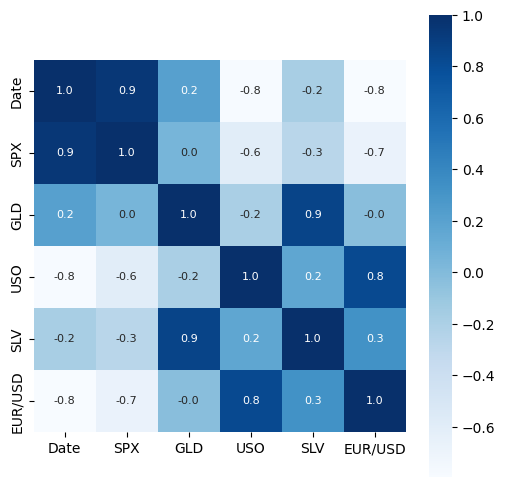

In [15]:
#Constructing the heatmap to understand the correlation
plt.figure(figsize = (6,6))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [16]:
print(correlation['GLD'])

Date       0.209118
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


Here, displot and histplot can be used distplot has been depricated and shows warnings



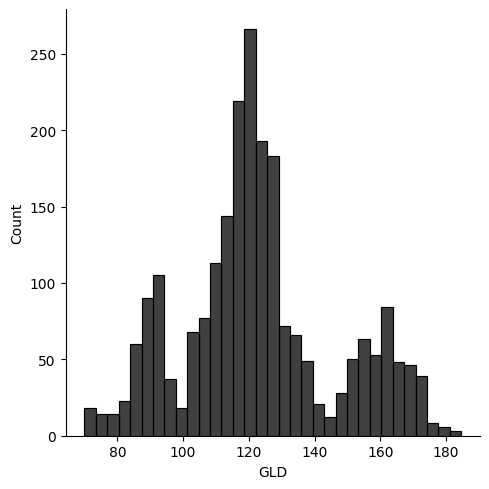

In [18]:
# Distribution of the gold Price
sns.displot(goldData['GLD'],color='black')

Splitting the Features and Target

In [20]:
X = goldData.drop(['Date','GLD'],axis=1) #REMOVING DATE and GLD COLUMN
Y = goldData['GLD']
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [21]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting Data
1. Training Data
2. Test Data

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)
#80 20 Ratio

Model Training: Random Forest Regressor

In [25]:
regressor = RandomForestRegressor(n_estimators=100)

In [26]:
# Training our model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation


In [27]:
# Prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [28]:
print(test_data_prediction)

[168.44459945  82.25739945 116.2110004  127.64870068 120.62510114
 154.83019774 150.58929906 126.21900027 117.53189856 125.9213007
 116.76920096 171.46510084 142.20749823 167.7176992  115.29160001
 117.56530036 138.03150314 170.10130027 159.16320307 157.72029882
 155.23670034 125.26220011 175.19439998 157.12050356 125.1691004
  93.95299956  78.23639998 120.85000015 119.16919975 167.50019927
  88.09510102 125.43570006  91.27670104 117.76710036 121.05849952
 136.06780081 115.36880149 115.50570048 148.1608995  107.19380069
 104.57790241  87.11669807 126.62260046 118.09459967 154.12769919
 119.68660031 108.31719978 108.24859853  93.09280029 127.18289747
  74.82250044 113.67439925 121.04039986 111.22299937 118.94039919
 120.73009955 159.36720054 169.74020172 147.29149688  85.90849862
  94.04210039  86.89299891  90.45940019 118.97070078 126.44870074
 127.64589985 167.90230008 122.26569962 117.48929916  98.71110049
 168.10900181 143.30079792 131.7116025  121.26980207 120.69459954
 119.7523006

In [29]:
# R squared error (Metrics gives us this error)
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9883587559550432


Comparing Actual Values and Predicted Values in a Plot

In [30]:
Y_test = list(Y_test)

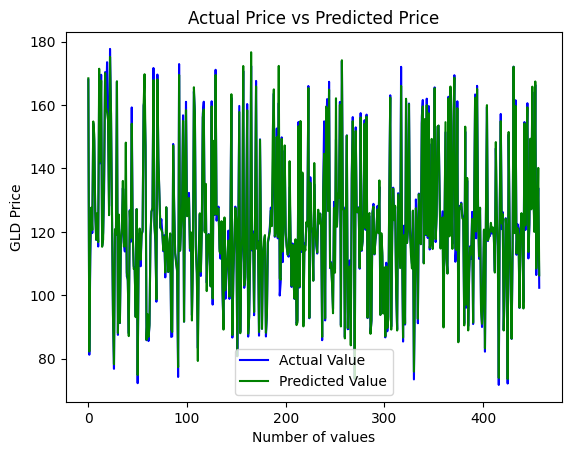

In [31]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()